In [31]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn
from seaborn import countplot
from seaborn import heatmap
from matplotlib import rcParams

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(918, 12)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df = df[(df[['RestingBP', 'Cholesterol', 'MaxHR']] != 0).all(1)]

df.shape

(746, 12)

In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df['Age'].describe()

count    746.000000
mean      52.882038
std        9.505888
min       28.000000
25%       46.000000
50%       54.000000
75%       59.000000
max       77.000000
Name: Age, dtype: float64

In [9]:
df['Age_Decade'] = pd.cut(x=df['Age'], bins=[20, 29, 39, 49, 59, 69, 79], labels=['20s', '30s', '40s', '50s', '60s', '70s'])

array([[<AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>]], dtype=object)

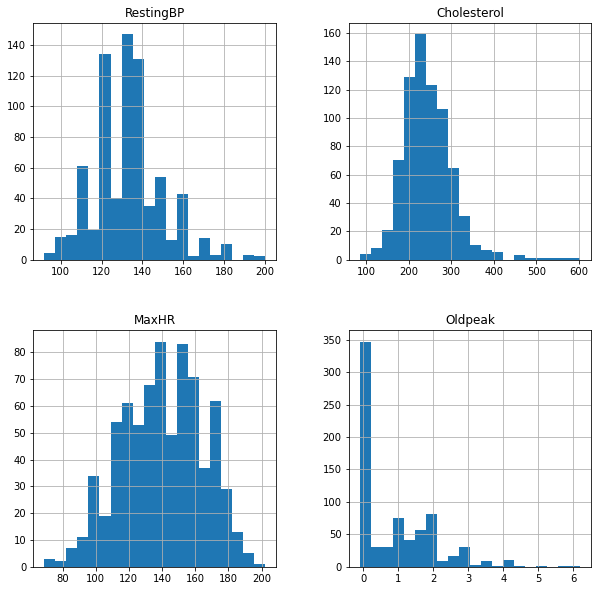

In [10]:
df_numeric = df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

df_numeric.hist(figsize=(10, 10), bins=20)

In [11]:
df_categorical = df[['Age_Decade', 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']]

categorical_cols = list(df_categorical.columns)

In [12]:
for col in df_categorical:
    print(col, df_categorical[col].unique())

Age_Decade ['40s', '30s', '50s', '60s', '20s', '70s']
Categories (6, object): ['20s' < '30s' < '40s' < '50s' < '60s' < '70s']
Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
FastingBS [0 1]
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']
HeartDisease [0 1]


In [22]:
df_categorical['FastingBS'] = df_categorical['FastingBS'].replace([0,1],['Below 120mg/dl', 'Above 120mg/dl'])
df_categorical['ExerciseAngina'] = df_categorical['ExerciseAngina'].replace(['N','Y'],['No', 'Yes'])
df_categorical['HeartDisease']= df_categorical['HeartDisease'].replace([0,1],['No', 'Yes'])


df['FastingBS'] = df['FastingBS'].replace([0,1],['Below 120mg/dl', 'Above 120mg/dl'])
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N','Y'],['No', 'Yes'])
df['HeartDisease']= df['HeartDisease'].replace([0,1],['No', 'Yes'])


<ipython-input-22-f21faea83349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['FastingBS'] = df_categorical['FastingBS'].replace([0,1],['Below 120mg/dl', 'Above 120mg/dl'])
<ipython-input-22-f21faea83349>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['ExerciseAngina'] = df_categorical['ExerciseAngina'].replace(['N','Y'],['No', 'Yes'])
<ipython-input-22-f21faea83349>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

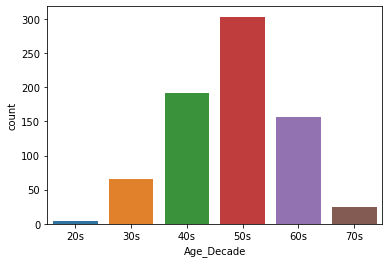

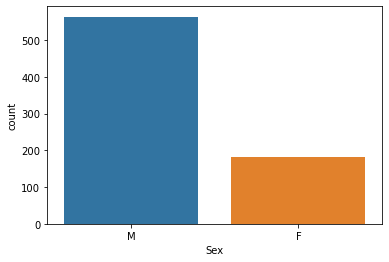

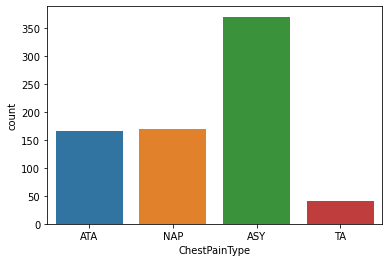

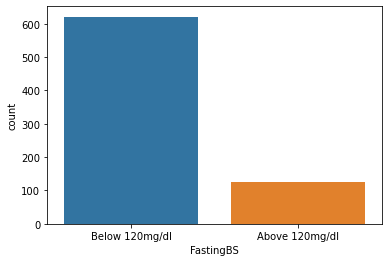

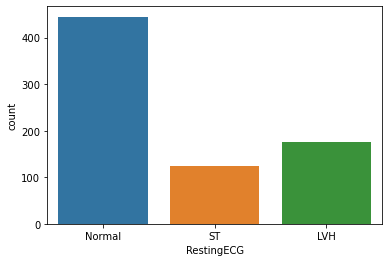

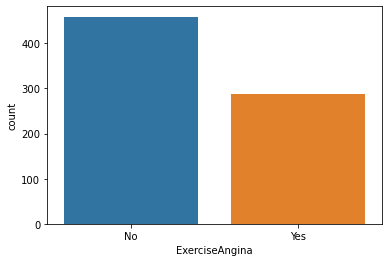

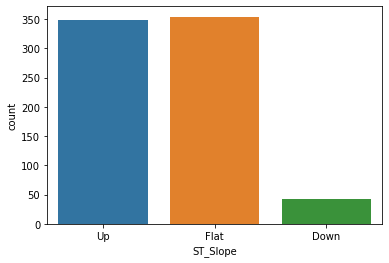

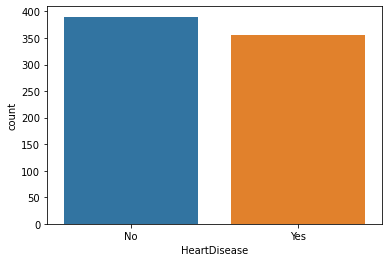

In [14]:
for col in categorical_cols:
    sns.countplot(x = col, data = df_categorical)
    plt.show()

<AxesSubplot:>

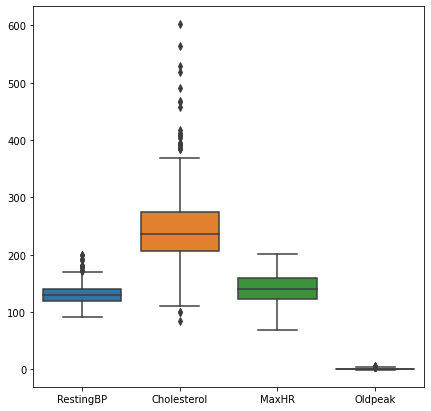

In [33]:
rcParams['figure.figsize'] = 7, 7

sns.boxplot(data=df_numeric)

<AxesSubplot:xlabel='Age', ylabel='RestingBP'>

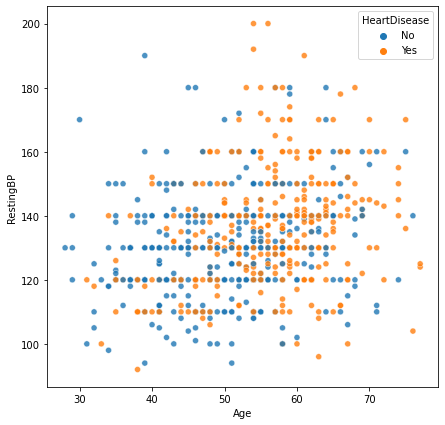

In [29]:
rcParams['figure.figsize'] = 7, 7

sns.scatterplot(data=df, x="Age", y="RestingBP", hue="HeartDisease", alpha=0.8)

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

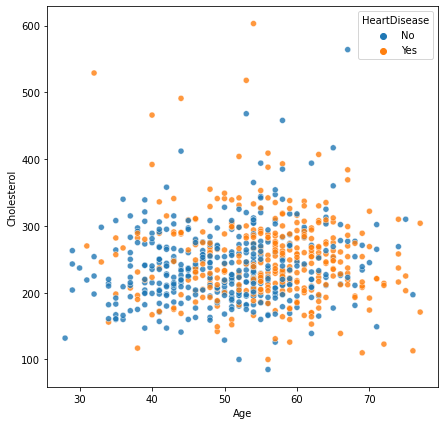

In [30]:
rcParams['figure.figsize'] = 7, 7

sns.scatterplot(data=df, x="Age", y="Cholesterol", hue="HeartDisease", alpha=0.8)